In [1]:
import pickle
import pandas as pd
from sklearn import tree

data = pd.read_csv("data-turbine/clear-data.csv")
model = pickle.load(open("data-turbine/tree.model.sav", "rb"))
features = (
    data
    .drop(["CO"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- TIT <= 1058.15
|   |--- TAT <= 543.87
|   |   |--- TAT <= 528.12
|   |   |   |--- AH <= 92.13
|   |   |   |   |--- value: [21.02]
|   |   |   |--- AH >  92.13
|   |   |   |   |--- value: [41.58]
|   |   |--- TAT >  528.12
|   |   |   |--- TIT <= 1028.85
|   |   |   |   |--- value: [13.71]
|   |   |   |--- TIT >  1028.85
|   |   |   |   |--- value: [9.47]
|   |--- TAT >  543.87
|   |   |--- TAT <= 549.23
|   |   |   |--- TIT <= 1049.65
|   |   |   |   |--- value: [7.00]
|   |   |   |--- TIT >  1049.65
|   |   |   |   |--- value: [5.61]
|   |   |--- TAT >  549.23
|   |   |   |--- TIT <= 1056.05
|   |   |   |   |--- value: [4.70]
|   |   |   |--- TIT >  1056.05
|   |   |   |   |--- value: [4.08]
|--- TIT >  1058.15
|   |--- TIT <= 1076.55
|   |   |--- TAT <= 545.34
|   |   |   |--- TIT <= 1076.45
|   |   |   |   |--- value: [6.29]
|   |   |   |--- TIT >  1076.45
|   |   |   |   |--- value: [30.38]
|   |   |--- TAT >  545.34
|   |   |   |--- TAT <= 549.52
|   |   |   |   |--- value: [

In [2]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

16

[if (TIT > 1058.15) and (TIT > 1076.55) and (TIT > 1091.35) and (TAT <= 530.625) -> 0.963,
 if (TIT > 1058.15) and (TIT > 1076.55) and (TIT > 1091.35) and (TAT > 530.625) -> 1.345,
 if (TIT <= 1058.15) and (TAT <= 543.87) and (TAT > 528.115) and (TIT <= 1028.85) -> 13.709,
 if (TIT <= 1058.15) and (TAT <= 543.87) and (TAT > 528.115) and (TIT > 1028.85) -> 9.473,
 if (TIT <= 1058.15) and (TAT > 543.87) and (TAT <= 549.235) and (TIT <= 1049.65) -> 7.003,
 if (TIT <= 1058.15) and (TAT > 543.87) and (TAT <= 549.235) and (TIT > 1049.65) -> 5.612,
 if (TIT <= 1058.15) and (TAT > 543.87) and (TAT > 549.235) and (TIT <= 1056.05) -> 4.698,
 if (TIT <= 1058.15) and (TAT > 543.87) and (TAT > 549.235) and (TIT > 1056.05) -> 4.079,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT <= 545.34) and (TIT <= 1076.45) -> 6.292,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT <= 545.34) and (TIT > 1076.45) -> 30.384,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT > 545.34) and (TAT <= 549.515) -> 3.8

In [3]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

16

[if (TIT > 1058.15) and (TAT <= 530.625) -> 0.963,
 if (TIT > 1058.15) and (TAT > 530.625) -> 1.345,
 if (TIT <= 1058.15) and (TAT <= 543.87) and (TAT > 528.115) -> 13.709,
 if (TIT <= 1058.15) and (TIT > 1028.85) and (TAT <= 543.87) and (TAT > 528.115) -> 9.473,
 if (TIT <= 1058.15) and (TAT > 543.87) and (TAT <= 549.235) -> 7.003,
 if (TIT <= 1058.15) and (TIT > 1049.65) and (TAT > 543.87) and (TAT <= 549.235) -> 5.612,
 if (TIT <= 1058.15) and (TAT > 543.87) -> 4.698,
 if (TIT <= 1058.15) and (TIT > 1056.05) and (TAT > 543.87) -> 4.079,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT <= 545.34) -> 6.292,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT <= 545.34) -> 30.384,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT > 545.34) and (TAT <= 549.515) -> 3.874,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT > 545.34) -> 2.883,
 if (TIT > 1058.15) and (TIT <= 1091.35) and (TAT <= 532.015) -> 12.044,
 if (TIT > 1058.15) and (TIT <= 1091.35) and (TAT > 532.015) -> 1.704,
 if (T

In [4]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
rules

15

[if (TIT > 1058.15) and (TAT <= 530.625) -> 0.963,
 if (TIT > 1058.15) and (TAT > 530.625) -> 1.345,
 if (TIT <= 1058.15) and (TAT <= 543.87) and (TAT > 528.115) -> 13.709,
 if (TIT <= 1058.15) and (TIT > 1028.85) and (TAT <= 543.87) and (TAT > 528.115) -> 9.473,
 if (TIT <= 1058.15) and (TAT > 543.87) and (TAT <= 549.235) -> 7.003,
 if (TIT <= 1058.15) and (TIT > 1049.65) and (TAT > 543.87) and (TAT <= 549.235) -> 5.612,
 if (TIT <= 1058.15) and (TAT > 543.87) -> 4.698,
 if (TIT <= 1058.15) and (TIT > 1056.05) and (TAT > 543.87) -> 4.079,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT <= 545.34) -> 18.338,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT > 545.34) and (TAT <= 549.515) -> 3.874,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT > 545.34) -> 2.883,
 if (TIT > 1058.15) and (TIT <= 1091.35) and (TAT <= 532.015) -> 12.044,
 if (TIT > 1058.15) and (TIT <= 1091.35) and (TAT > 532.015) -> 1.704,
 if (TIT <= 1058.15) and (TAT <= 543.87) and (AH <= 92.135) -> 21.024,
 if (T

In [5]:
from sklearn.model_selection import train_test_split

random_state = 9

y = data["CO"]
X = data.drop(["CO"], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)
display(X_train, y_train, X_test, y_test)

AH     TIT     TAT
4480   83.256  1100.0  540.65
24883  73.583  1099.8  538.53
21557  81.089  1100.0  534.04
1705   64.757  1086.6  549.76
21388  75.645  1100.0  534.21
...       ...     ...     ...
25725  85.663  1072.2  549.82
5014   75.280  1058.0  549.86
22584  92.874  1067.2  550.15
501    93.029  1099.9  524.78
20828  88.840  1079.9  550.02

[29386 rows x 3 columns]

4480     0.3527
24883    1.2522
21557    1.4718
1705     1.3117
21388    1.7835
          ...  
25725    2.4980
5014     3.2652
22584    1.2630
501      0.7851
20828    2.7272
Name: CO, Length: 29386, dtype: float64

AH     TIT     TAT
18246  84.837  1088.7  550.39
20343  59.574  1100.0  542.01
2924   81.262  1092.9  544.91
117    88.135  1100.0  526.21
5713   86.846  1080.2  550.25
...       ...     ...     ...
21917  75.935  1081.1  549.66
13099  78.314  1089.8  550.37
26704  79.478  1073.0  550.19
4182   41.623  1100.2  539.10
2982   69.233  1091.6  549.98

[7347 rows x 3 columns]

18246    1.34970
20343    1.63430
2924     0.78632
117      0.72742
5713     1.35980
          ...   
21917    1.45140
13099    1.00960
26704    2.01190
4182     0.37685
2982     1.15990
Name: CO, Length: 7347, dtype: float64

In [6]:
from src.rules import simplify_rules

rules = simplify_rules(X_train, rules)
rules

[if (TIT = 1100.9) and (TAT = 511.04) -> 0.963,
 if (TIT = 1100.9) and (TAT = 550.6) -> 1.345,
 if (TIT = 1001.3) and (TAT = 535.993) -> 13.709,
 if (TIT = 1043.5) and (TAT = 535.993) -> 9.473,
 if (TIT = 1001.3) and (TAT = 546.552) -> 7.003,
 if (TIT = 1053.9) and (TAT = 546.552) -> 5.612,
 if (TIT = 1001.3) and (TAT = 550.6) -> 4.698,
 if (TIT = 1057.1) and (TAT = 550.6) -> 4.079,
 if (TIT = 1067.35) and (TAT = 511.04) -> 18.338,
 if (TIT = 1067.35) and (TAT = 547.428) -> 3.874,
 if (TIT = 1067.35) and (TAT = 550.6) -> 2.883,
 if (TIT = 1074.75) and (TAT = 511.04) -> 12.044,
 if (TIT = 1074.75) and (TAT = 550.6) -> 1.704,
 if (TIT = 1001.3) and (TAT = 511.04) and (AH = 24.085) -> 21.024,
 if (TIT = 1001.3) and (TAT = 511.04) and (AH = 100.2) -> 41.576]

In [7]:
data.describe().transpose()

count         mean        std          min        25%        50%  \
AH   36733.0    77.867015  14.461355    24.085000    68.1880    80.4700   
TIT  36733.0  1081.428084  17.536373  1000.800000  1071.8000  1085.9000   
TAT  36733.0   546.158517   6.842360   511.040000   544.7200   549.8800   
CO   36733.0     2.372468   2.262672     0.000388     1.1824     1.7135   

           75%       max  
AH     89.3760   100.200  
TIT  1097.0000  1100.900  
TAT   550.0400   550.610  
CO      2.8429    44.103

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


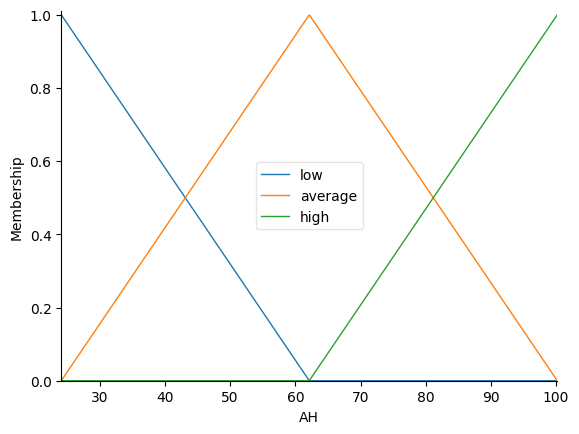

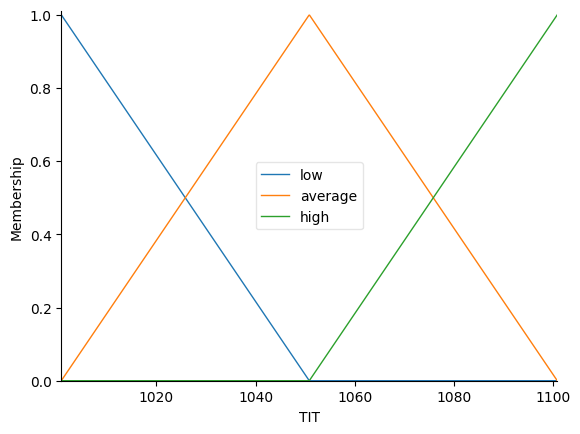

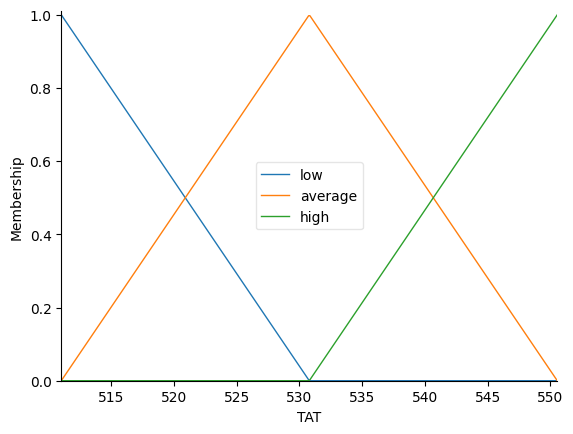

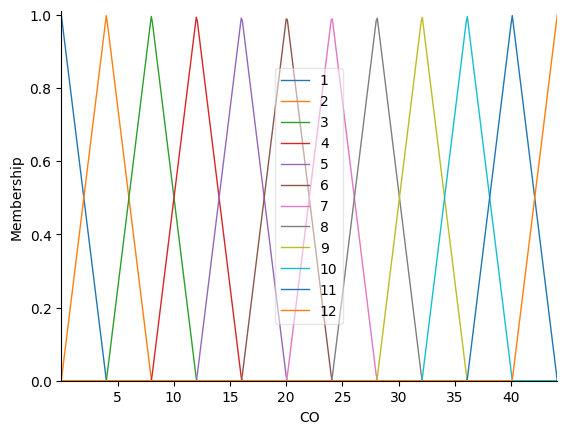

In [18]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

# AT = ctrl.Antecedent(np.arange(-6.2348, 37.103, 0.0001), "AT")
# AP = ctrl.Antecedent(np.arange(985.85, 1036.6, 0.01), "AP")
AH = ctrl.Antecedent(np.arange(24.085, 100.2, 0.1), "AH")
# AFDP = ctrl.Antecedent(np.arange(2.0874, 7.6106, 0.0001), "AFDP")
TIT = ctrl.Antecedent(np.arange(1000.8, 1100.9, 0.1), "TIT")
TAT = ctrl.Antecedent(np.arange(511.04, 550.61, 0.1), "TAT")
CO = ctrl.Consequent(np.arange(0.000388, 44.103, 0.1), "CO")

# AT.automf(3, variable_type="quant")
# AP.automf(5, variable_type="quant")
AH.automf(3, variable_type="quant")
AH.view()
# AFDP.automf(3, variable_type="quant")
TIT.automf(3, variable_type="quant")
# TIT["low"] = fuzz.zmf(TIT.universe, 1025, 1035)
# TIT["average"] = fuzz.trapmf(TIT.universe, [1025, 1035, 1056, 1075])
# TIT["high"] = fuzz.smf(TIT.universe, 1065, 1075)
TIT.view()
TAT.automf(3, variable_type="quant")
# TAT["low"] = fuzz.zmf(TAT.universe, 520, 525)
# TAT["average"] = fuzz.trapmf(TAT.universe, [520, 525, 535, 540])
# TAT["high"] = fuzz.smf(TAT.universe, 535, 540)
TAT.view()
CO.automf(names=[str(i) for i in range(1, 13)], variable_type="quant")
# CO["low"] = fuzz.zmf(CO.universe, 10, 13)
# CO["average"] = fuzz.trapmf(CO.universe, [10, 13, 30, 33])
# CO["high"] = fuzz.smf(CO.universe, 30, 33)
CO.view()

In [19]:
from src.rules import get_fuzzy_rules

fuzzy_variables = {
    # "AT": AT,
    # "AP": AP,
    "AH": AH,
    # "AFDP": AFDP,
    "TIT": TIT,
    "TAT": TAT,
    "consequent": CO,
}
fuzzy_rules = get_fuzzy_rules(rules, fuzzy_variables)

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

9

[IF TIT[high] AND TAT[low] THEN CO[1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[high] AND TAT[high] THEN CO[1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[low] AND TAT[average] THEN CO[4]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[average] AND TAT[average] THEN CO[3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[low] AND TAT[high] THEN CO[3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[average] AND TAT[low] THEN CO[4]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[average] AND TAT[high] THEN CO[1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (TIT[low] AND TAT[low]) AND AH[low] THEN CO[6]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (TIT[low] AND TAT[low]) AND AH[high] THEN CO[11]
 	AND aggregation function : fmin
 	OR aggregation function 

 Antecedents 
Antecedent: TIT                     = 1100.0
  - low                             : 0.0
  - average                         : 0.017982017982469945
  - high                            : 0.9820179820175301
Antecedent: TAT                     = 526.21
  - low                             : 0.23189873417738902
  - average                         : 0.7681012658226116
  - high                            : 0.0
Antecedent: AH                      = 88.135
  - low                             : 0.0
  - average                         : 0.3166885676741368
  - high                            : 0.6833114323258631

 Rules 
RULE #0:
  IF TIT[high] AND TAT[low] THEN CO[1]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - TIT[high]                                              : 0.9820179820175301
  - TAT[low]                                               : 0.23189873417738902
                                    TIT[high] AND TAT[low] = 0.23189

np.float64(3.494757369017915)

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


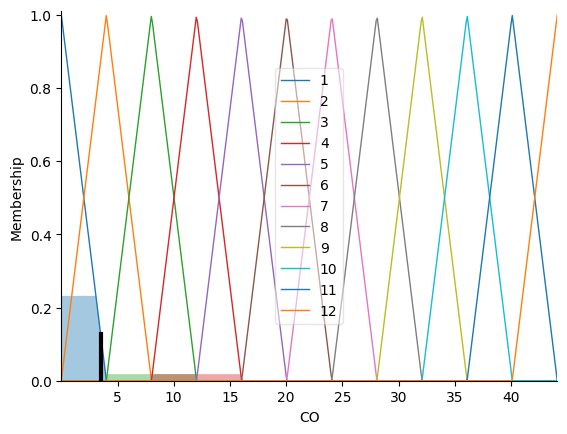

In [24]:
# sim.input["AT"] = 4.5878
# sim.input["AP"] = 1018.7
# sim.input["AH"] = 83.675
# sim.input["AFDP"] = 3.5758
# sim.input["TIT"] = 1086.2
# sim.input["TAT"] = 549.83
# sim.input["AT"] = 7.8167
# sim.input["AP"] = 1022.2
sim.input["AH"] = 88.135
# sim.input["AFDP"] = 4.6605
sim.input["TIT"] = 1100.0
sim.input["TAT"] = 526.21
sim.compute()
sim.print_state()
display(sim.output["CO"])
CO.view(sim=sim)

In [21]:
from sklearn import metrics
import math


def fuzzy_pred(row):
    # sim.input["AT"] = row["AT"]
    # sim.input["AP"] = row["AP"]
    sim.input["AH"] = row["AH"]
    # sim.input["AFDP"] = row["AFDP"]
    sim.input["TIT"] = row["TIT"]
    sim.input["TAT"] = row["TAT"]
    sim.compute()
    return sim.output["CO"]


def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))

result_train = X_train.copy()
result_train["Real"] = y_train
result_train = result_train[:10000]

result_train["Inferred"] = result_train.apply(fuzzy_pred, axis=1)
result_train["RMSE"] = result_train.apply(rmse, axis=1)
result_train = result_train.round({"RMSE": 3})
result_train.head(15)

AH     TIT     TAT    Real  Inferred   RMSE
4480   83.256  1100.0  540.65  0.3527  2.122815  1.770
24883  73.583  1099.8  538.53  1.2522  2.418762  1.167
21557  81.089  1100.0  534.04  1.4718  3.026952  1.555
1705   64.757  1086.6  549.76  1.3117  2.374747  1.063
21388  75.645  1100.0  534.21  1.7835  2.976760  1.193
36422  69.953  1076.7  549.96  2.9304  2.398142  0.532
21816  70.858  1087.8  549.43  1.7219  2.666172  0.944
34158  47.855  1085.2  549.91  1.5878  2.242754  0.655
12784  69.850  1090.5  550.26  2.0753  1.754647  0.321
30182  70.275  1060.9  550.13  4.1917  1.906511  2.285
3996   61.376  1092.2  549.89  0.3633  2.155418  1.792
31492  63.967  1085.9  549.98  2.0315  2.151404  0.120
36021  61.707  1081.1  549.34  2.3146  2.914147  0.600
21791  96.150  1087.7  549.79  1.2175  2.323823  1.106
1054   80.911  1086.1  550.32  1.1838  1.733644  0.550

In [22]:
result_test = X_test.copy()
result_test["Real"] = y_test

result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["RMSE"] = result_test.apply(rmse, axis=1)
result_test = result_test.round({"RMSE": 3})
result_test

AH     TIT     TAT     Real  Inferred   RMSE
18246  84.837  1088.7  550.39  1.34970  1.608328  0.259
20343  59.574  1100.0  542.01  1.63430  2.036748  0.402
2924   81.262  1092.9  544.91  0.78632  3.997200  3.211
117    88.135  1100.0  526.21  0.72742  3.494757  2.767
5713   86.846  1080.2  550.25  1.35980  1.928498  0.569
...       ...     ...     ...      ...       ...    ...
21917  75.935  1081.1  549.66  1.45140  2.606285  1.155
13099  78.314  1089.8  550.37  1.00960  1.622633  0.613
26704  79.478  1073.0  550.19  2.01190  2.042107  0.030
4182   41.623  1100.2  539.10  0.37685  2.116185  1.739
2982   69.233  1091.6  549.98  1.15990  2.066452  0.907

[7347 rows x 6 columns]

In [23]:
rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["RMAE_train"] = math.sqrt(
    metrics.mean_absolute_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["MAE_train"] = float(
    metrics.mean_absolute_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["MAE_test"] = float(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["R2_train"] = metrics.r2_score(result_train["Real"], result_train["Inferred"])
rmetrics["R2_test"] = metrics.r2_score(result_test["Real"], result_test["Inferred"])

rmetrics

{'RMSE_train': 2.0980454600317606,
 'RMSE_test': 2.05886400827211,
 'RMAE_train': 1.1847436158491003,
 'RMAE_test': 1.1874008432872027,
 'MAE_train': 1.4036174352952007,
 'MAE_test': 1.4099207626391603,
 'R2_train': 0.1608000420839235,
 'R2_test': 0.16319151715106217}